In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [6]:
#Load datase
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
print("Dataset shape:",df.shape)
print("\nDataset Info:")
print (df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (4269, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3

In [18]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [20]:

# Show missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

#Fill missing values for numerical columns using median

df['no_of_dependents'] = df['no_of_dependents'].fillna(df['no_of_dependents'].median())
df['income_annum'] = df['income_annum'].fillna(df['income_annum'].median())
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].median())
df['loan_term'] = df['loan_term'].fillna(df['loan_term'].median())
df['cibil_score'] = df['cibil_score'].fillna(df['cibil_score'].median())
df['residential_assets_value'] = df['residential_assets_value'].fillna(df['residential_assets_value'].median())
df['commercial_assets_value'] = df['commercial_assets_value'].fillna(df['commercial_assets_value'].median())
df['luxury_assets_value'] = df['luxury_assets_value'].fillna(df['luxury_assets_value'].median())
df['bank_asset_value'] = df['bank_asset_value'].fillna(df['bank_asset_value'].median())

# Fill missing values for categorical columns using mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['loan_status'] = df['loan_status'].fillna(df['loan_status'].mode()[0])

# Check again to confirm all missing values are handled

print("Missing values after cleaning:")
print(df.isnull().sum())




Missing values in each column:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
Missing values after cleaning:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


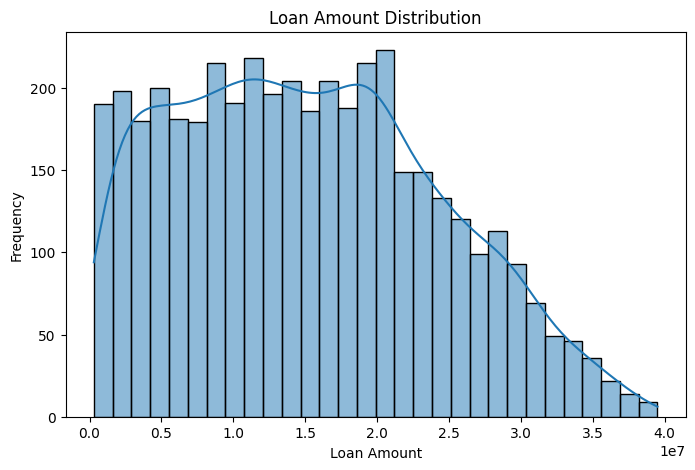

In [24]:
# Visualize Important Features

# 1 loan Amount Distrubution

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(df['loan_amount'],bins=30,kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


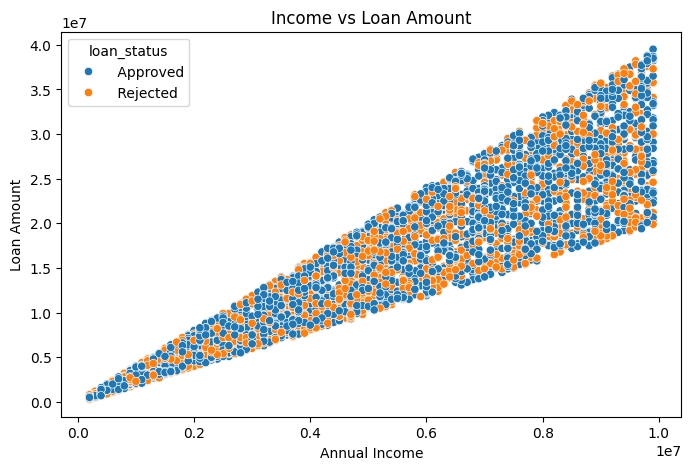

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='income_annum',y='loan_amount',hue='loan_status')
plt.title('Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

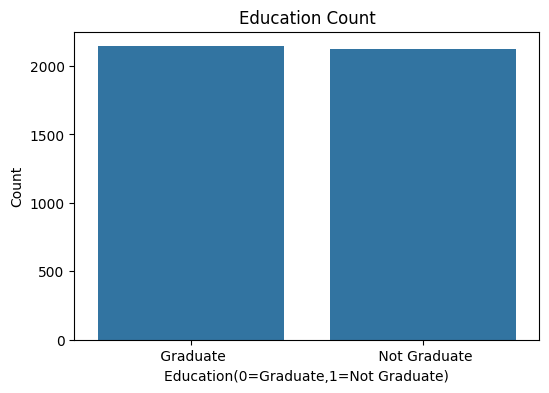

In [27]:
plt.figure(figsize = (6,4))
sns. countplot(x='education',data=df)
plt.title('Education Count')
plt.xlabel('Education(0=Graduate,1=Not Graduate)')
plt.ylabel('Count')
plt.show()

In [28]:
# Train a Machine Learning Model

# Drop columns that are not useful or non-numeric like loan_id
x = df.drop(['loan_id','loan_status'],axis=1)

#Target variables
y=df['loan_status']

In [ ]:
# Import Label Encoder
from sklearn.preprocessing
import LabelEncoder

In [38]:
# Apply label encoding to these  columns:

le = LabelEncoder()

# Encode each categorical column 
df['education']= le.fit_transform(df['education'])
df['self_employed']= le.fit_transform(df['self_employed'])
df['education']= le.fit_transform(df['loan_status'])
df['no_of_dependents']= le.fit_transform(df['no_of_dependents'])
# if it has value like '+3'


In [41]:
# Split the data(train/test)

from sklearn.model_selection import train_test_split

#70% training 30% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
# import the decisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Initialize the decision Tree model
tree_model = DecisionTreeClassifier(random_state=0)

#Train the model
tree_model.fit(X_train,y_train)

#Make predictions
y_pred_tree= tree_model.predict(X_test)

#Evaluate the model
tree_accuracy=accuracy_score(y_test,y_pred_tree)
print("Decision Tree Accuracy:",tree_accuracy)
tree_conf_matrix= confusion_matrix(y_test,y_pred_tree)
print("Decision Tree Confusion Matrix:")
print(tree_conf_matrix)


Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[810   0]
 [  0 471]]


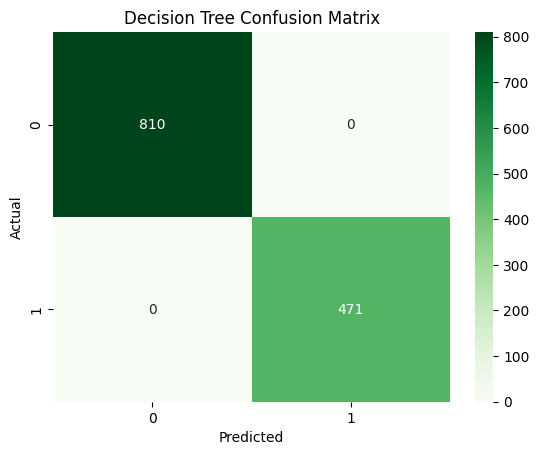

In [46]:
# Visualize Decision Tree Confusion Matrix (with heatmap)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tree_conf_matrix,annot=True,fmt="d",cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
# Evaluate model performance using accuracy score and confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

#Accuracy score
accuracy= accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

#Confusion matrix

conf_matrix= confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8017174082747853
Confusion Matrix:
[[741  69]
 [185 286]]
